<a href="https://colab.research.google.com/github/mohammed893/API_image_TF_MODEL/blob/The_AI_Model/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#end to end multi-class Dog Bread Classification

# end to end multi-class Dog Bread Classification
## 1. Problem
## 2. Data
## 3. Evaluation
is a file with predictions probabilities  vs real
## 4. Features
> we are working with images (unstructured data) => we will use deep learning

>There is 120 deifferent classes





# Get Our workspace ready
> import TF    ✅

> import TF HUB

> Make sure we're using a GPU

In [ ]:
#Import TenserFlow into Colab
import tensorflow as tf
import tensorflow_hub as hub
# CHeck For GPU availability
print ("GPU" , "available(SUIIIIIIII!!!!!!!!!)" if tf.config.list_physical_devices("GPU") else "NOOO :(")

GPU available(SUIIIIIIII!!!!!!!!!)


In [ ]:
!unzip "drive/MyDrive/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/"

Archive:  drive/MyDrive/dog-breed-identification.zip
replace drive/MyDrive/Dog Vision/labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
## Turning Data into Tensors (Numerical format)
import pandas as pd

In [ ]:
#Checkout the labels
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print (labels_csv.head())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: >

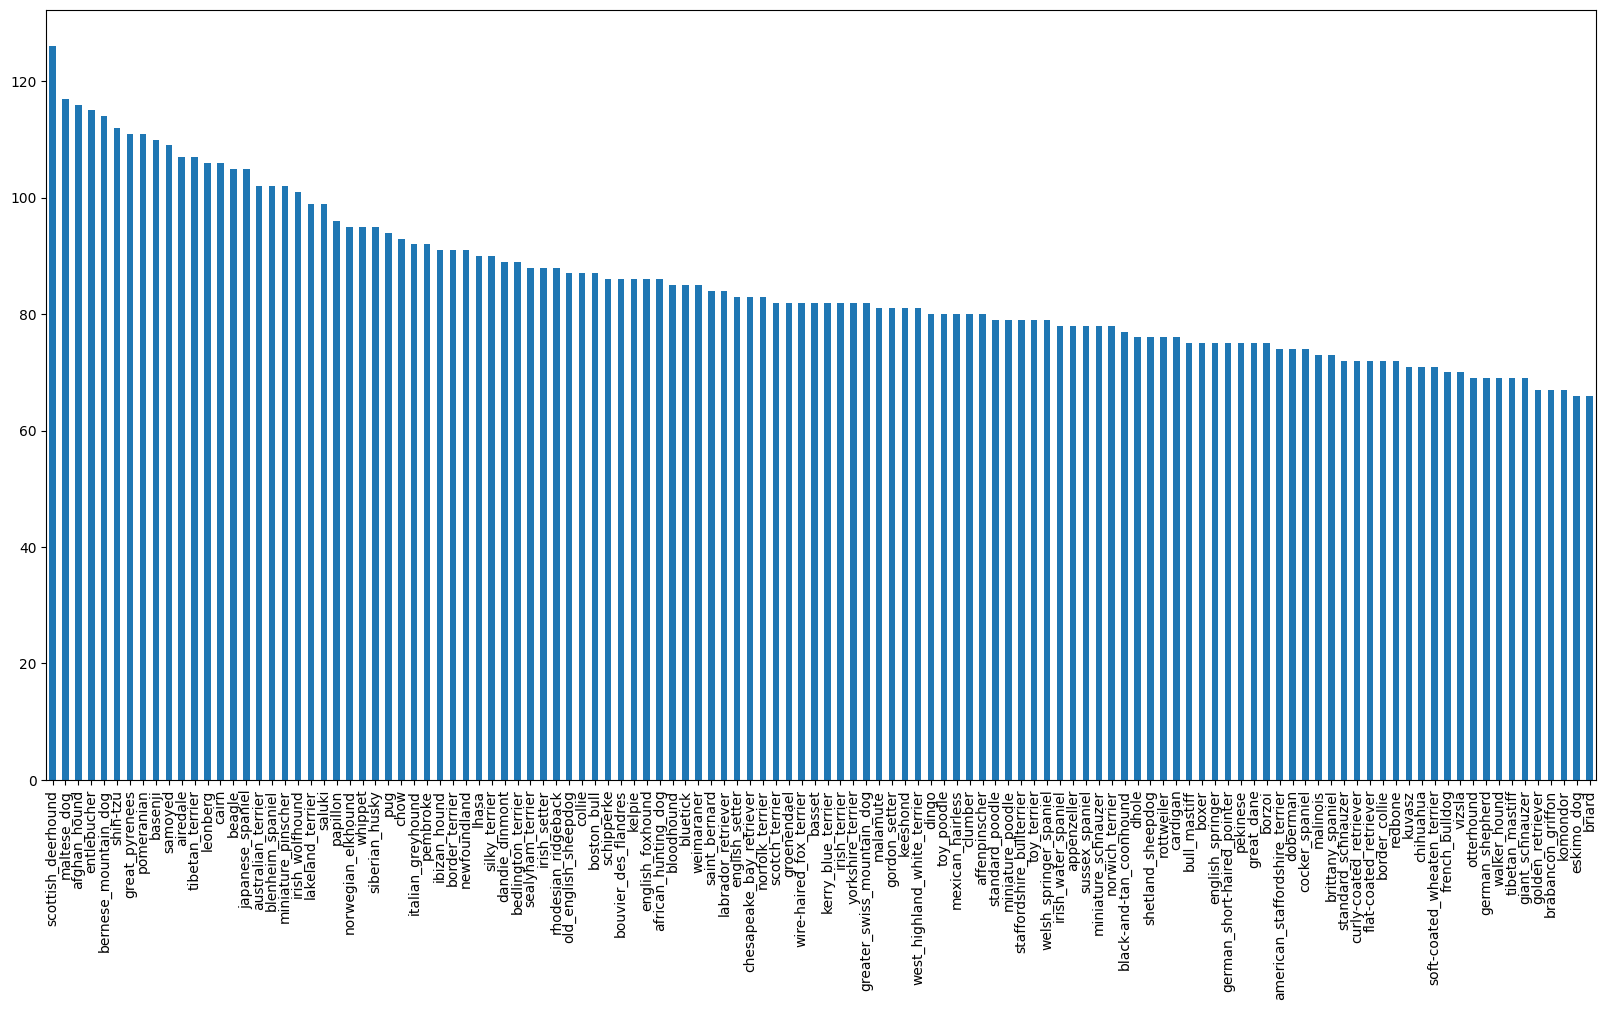

In [ ]:
#How many Images are there of each bread ?
labels_csv["breed"].value_counts().plot.bar(figsize = (20 , 10))




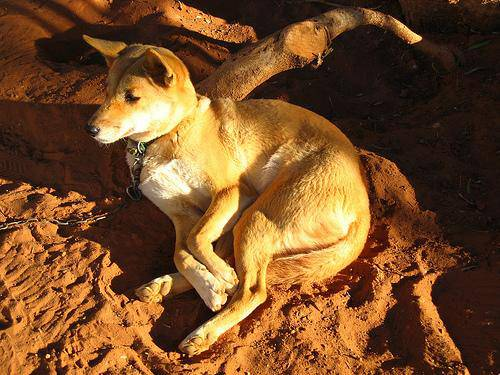

In [ ]:
from IPython.display import Image
Image("drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Getting Images and their labels
## let's get a list of all of our image pathnames
filenames = ["drive/My Drive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
#check the first 10
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! proceed.")
else:
  print("no matching")

Filenames match actual amount of files!!! proceed.


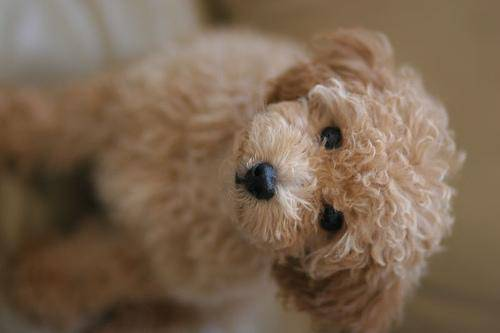

In [ ]:
##one more check
Image(filenames[9100])

In [ ]:
labels_csv["breed"][9100]

'toy_poodle'

let's prepare our labels


In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
## check if num of labels matches the num of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames !")
else:
  print("num of labels doesNot Mathch num of filenames")


Number of labels matches number of filenames !


In [ ]:
#Find the unique label values
uniqe_breeds = np.unique(labels)
uniqe_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
#Turn a single label intao an array of bool
print(labels[0])
labels[0] == uniqe_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into Bool
bool_label = [label == uniqe_breeds for label in labels]
bool_label[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# e.g : Turning bool array into INT
print(labels[0])
print(np.where(uniqe_breeds == labels[0]))
print(bool_label[0].argmax()) #index when label accurs in bool array
print(bool_label[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
bool_label[:10]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
#Setup X , Y variables
x = filenames
y = bool_label

In [ ]:
len(filenames)

10222

i will start off experiments with only 1k sample instead of 10k samples


In [ ]:
# set num of images to use for exp
NUM_IMAGES = 1000 #@param{type : "slider" , min : 1000 , max : 10000 , step : 1000}



In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split
# Split Them train and validation of total size NUM_IMAGES
x_train , x_val , y_train , y_val = train_test_split(x[:NUM_IMAGES] ,
                                                     y[:NUM_IMAGES] ,
                                                     test_size= 0.2 ,
                                                     random_state = 42)
len(x_train) , len(y_train) , len(x_val) , len(y_val)



(800, 800, 200, 200)

In [ ]:
#Let's have a geez at the training data
x_train[:2] , y_train[:2]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, F

In [ ]:
#Preprocessing Images (Turning images into Tensors)
#Function takes filepath as input
#Use TF to read the file and save it to (Image) variable
#Turn `Image` into Tensors
#ReSize the `Image` to be a shape of (244 , 244)
# RETURN the modified image




In [ ]:
##Converting image to a numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
#Turn image into Tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [ ]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [ ]:
#Define image size
IMG_SIZE = 224
def process_img (image_path , img_size = IMG_SIZE) :
  """
  TAKE PATH TURN AND INTO TENSOR

  """

  #read in an image file
  image = tf.io.read_file(image_path)
  #Turn jpg into numerical tensor with 3 colour channels Red Green Blue
  image = tf.image.decode_jpeg(image , channels = 3)
  #Convert the color channel value from 0 - 255 to 0 - 1 values  (NORMALIZATION)
  image = tf.image.convert_image_dtype(image , tf.float32)
  #resize image to our desired value (224 , 224)
  image = tf.image.resize(image , size = [img_size , img_size])
  return image

## Turning our data into Batches



In [ ]:
#Create a simple function to return tuple (image , label)
def get_img_label (image_path , label) :
  image = process_img(image_path)
  return image , label



In [ ]:
get_img_label(x[22] , y[22])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.1330032 , 0.05492197, 0.08260179],
         [0.12281288, 0.04473164, 0.07286915],
         [0.10271296, 0.02463173, 0.05307436],
         ...,
         [0.5843801 , 0.2659036 , 0.23074335],
         [0.42622918, 0.17718755, 0.12505569],
         [0.24508326, 0.04996776, 0.01638262]],
 
        [[0.4086272 , 0.375257  , 0.39908588],
         [0.36725003, 0.33319327, 0.35938936],
         [0.29389817, 0.25938374, 0.28715798],
         ...,
         [0.44133398, 0.20268634, 0.185602  ],
         [0.36695412, 0.16867074, 0.15405174],
         [0.2550185 , 0.08574145, 0.07356845]],
 
        [[0.56696117, 0.58506346, 0.60115546],
         [0.5850034 , 0.6031056 , 0.6203419 ],
         [0.5720782 , 0.59018046, 0.60817957],
         ...,
         [0.13036056, 0.00890197, 0.00958708],
         [0.24564041, 0.12379038, 0.15058532],
         [0.19309051, 0.06804112, 0.1088118 ]],
 
        ...,
 
        [[0.45460117, 0.4624443 

In [ ]:
BATCH_SIZE = 32
#Create a function to turn data into batches
def create_data_batches(x , y = None , batch_size = BATCH_SIZE , valid_data = False ,
                        test_data = False):
  """
  Create Batches of data out of image (X) and label (y) pairs
  Shuffles the data -- TO MAKE SURE ORDER does not affect out model
  DON'T shuffle if it's a validation data
  """
  #if the data is a test data set , we don't have labels
  if test_data:
    print("Creating test data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) #only filepath no labels
    data_batch = data.map(process_img).batch(batch_size)
    return data_batch
#If the data is a valid dataset , we don't need to shuffle it
  elif valid_data:
    print("Creating Valid data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x) , #File_paths
                                               tf.constant(y))) #Labels
    data_batch = data.map(get_img_label).batch(batch_size)
    return data_batch
  #Train data , we have labels , we have to shuffle
  else:
    print("Creating Train data batches")
    #Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x) , tf.constant(y)))
    #Shuffling
    data = data.shuffle(buffer_size = len(x))
    #Creating (image , label) tuples (this also turns th e img path into a preprocessed img)
    data = data.map(get_img_label)

    #Turn the Training data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch



In [ ]:
#Creating training and validation data batches
train_data = create_data_batches(x = x_train , y = y_train)
val_data = create_data_batches(x_val , y_val , valid_data = True)

Creating Train data batches
Creating Valid data batches


In [ ]:
#Checking of the different attributes of our data batches
train_data.element_spec , val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Batches

Our data is now in batches , let's Visualize them

In [ ]:
import matplotlib.pyplot as plt
#Create a function for viewing imgs in a data batches
def show_25_images(images , labels):
  """
  Display a plot of 25 imgs and their labels from a data batch
  """
  #Setup the Fig
  plt.figure(figsize = (10 , 10 ))
  #Loop through 25
  for i in range(25):
    #Create subplots (5rows , 5 cols)
    ax = plt.subplot(5 , 5 , i+1)
    #Display an image
    plt.imshow(images[i])
    #Add the image labels as the title
    plt.title(uniqe_breeds[labels[i].argmax()])
    #Turn the grid lines off
    plt.axis("off")


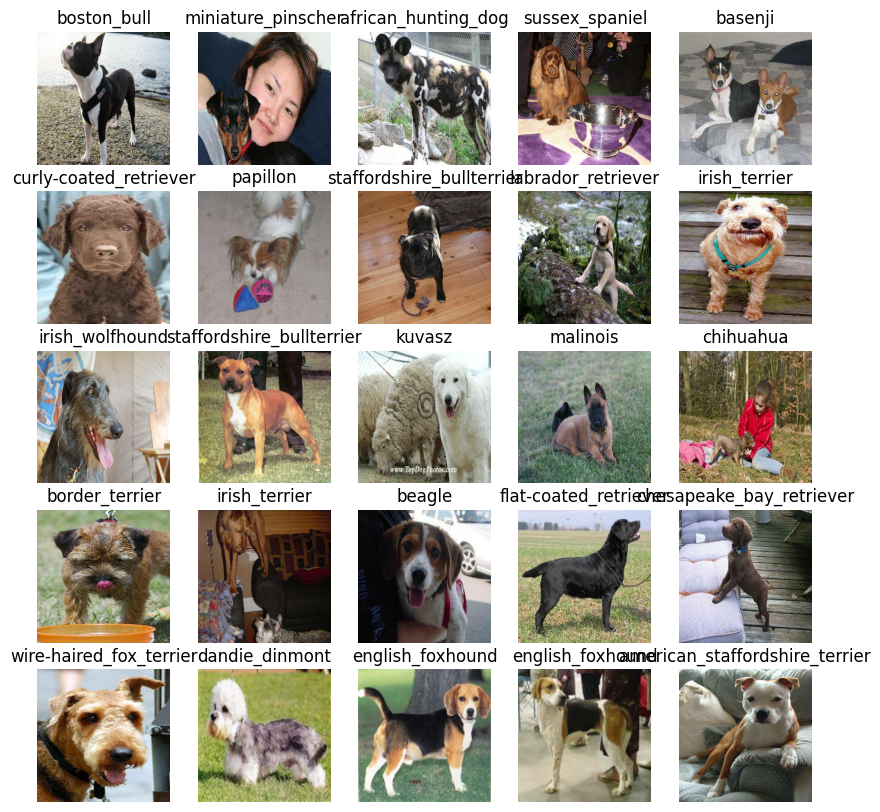

In [ ]:
train_images , train_labels = next (train_data.as_numpy_iterator())
show_25_images(train_images , train_labels)

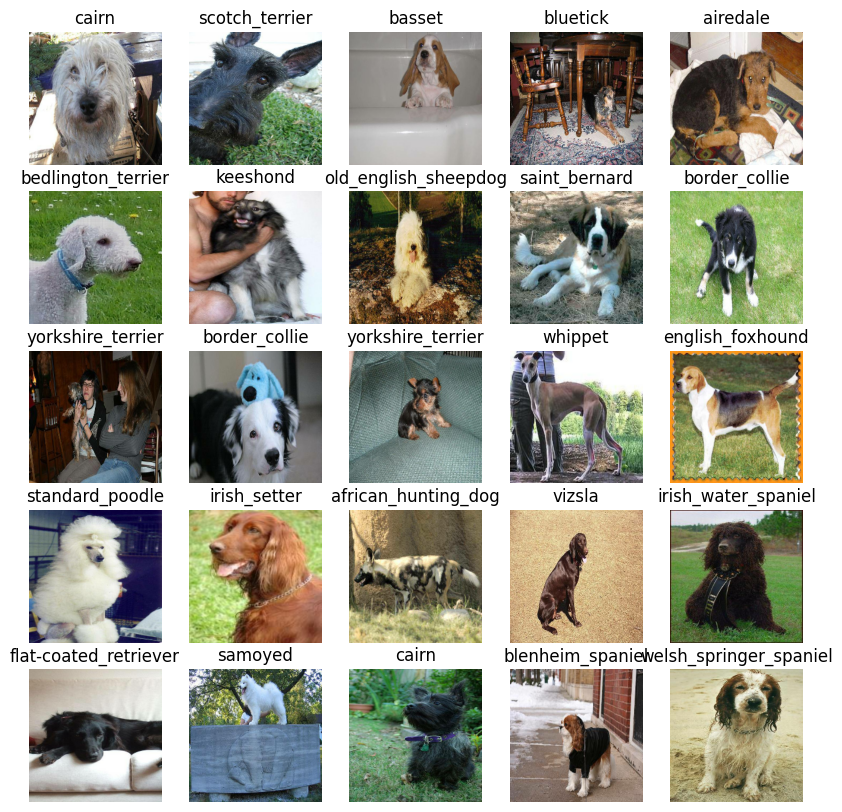

In [ ]:
#Let's visualize val set
val_images , val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images , val_labels)

# Building a Model
Before we build a model , there are a few things we need to define
* the input shape (our images shape , in the form of Tensors )
* the output shape
* the Url of the model we are going to use



In [ ]:
IMG_SIZE

224

In [ ]:
#Setup input shape to the model
INPUT_SHAPE = [None , IMG_SIZE ,IMG_SIZE , 3 ] #Batch , height , width , colour channels
#Set the Output shape
OUTPUT_SHAPE = len(uniqe_breeds)
#Setup model URL from Tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [ ]:
#Create a function which Build a Keras Model
def create_model(input_shape = INPUT_SHAPE , output_shape = OUTPUT_SHAPE , model_url = MODEL_URL) :
  print("Building model")
  model = tf.keras.Sequential([
      hub.KerasLayer(model_url) , #First LAYER
      tf.keras.layers.Dense(units =OUTPUT_SHAPE , #Second layer
                            activation = "softmax")]
  )


  #Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer  = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )
  #Build the model
  model.build(INPUT_SHAPE)
  return model

In [ ]:
model = create_model()
model.summary()

Building model
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_2 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


#Creating call backs --> It's a helper functions a model can use during the training to do such things as Save its progress , check its progress or stop training


















In [ ]:
#TensorBoard Call back
##-->To setup it we need to do 3 Things
#----Load extension---
#----Create a TB call back which is able to save logs---
#Visualize


#--> Load TB notebook extension
%load_ext tensorboard



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import datetime
#Create a function to build a TB callback
def create_Tensorboard_callback():
  #Create a log dir for storing TB Logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs" , datetime.datetime.now().strftime("%Y%m%d-%H%M%S%"))
  return tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
#Create early stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy' ,
                                                  patience = 3)


In [ ]:
#Training a model (on a subset of data ) with First Model
NUM_EPOCHS = 100 #@param{type:"slider" , min : 10 , max : 100 , step : 10}


In [ ]:
# Check to make sure we are running on a GPU
print("GPU" , "available(YESSSSSSSSSSSS)" if tf.config.list_physical_devices("GPU") else "Nope")


GPU available(YESSSSSSSSSSSS)


In [ ]:
#Creating a function that trains a model
def train_model():
  """
  Trains the model and returns the trained Version
  """
  #Create a model
  model = create_model()

  #Create a TB session every time we train the model
  tensorboard = create_Tensorboard_callback()
  #Fit the data to the model passing it the callbacks we created
  model.fit(x = train_data ,
            epochs = NUM_EPOCHS ,
            validation_data = val_data,
            validation_freq = 1 ,
            callbacks = [tensorboard , early_stopping])
  return model



In [ ]:
#Fit the model to the data
model = train_model()

Building model
Epoch 1/100
25/25 [==============================] - 106s 4s/step - loss: 4.6725 - accuracy: 0.0887 - val_loss: 3.3115 - val_accuracy: 0.3050
Epoch 2/100
25/25 [==============================] - 3s 108ms/step - loss: 1.6640 - accuracy: 0.6662 - val_loss: 2.0822 - val_accuracy: 0.5450
Epoch 3/100
25/25 [==============================] - 4s 147ms/step - loss: 0.5898 - accuracy: 0.9375 - val_loss: 1.6316 - val_accuracy: 0.5950
Epoch 4/100
25/25 [==============================] - 3s 116ms/step - loss: 0.2605 - accuracy: 0.9862 - val_loss: 1.4466 - val_accuracy: 0.6300
Epoch 5/100
25/25 [==============================] - 3s 111ms/step - loss: 0.1503 - accuracy: 0.9950 - val_loss: 1.3541 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 3s 108ms/step - loss: 0.1029 - accuracy: 1.0000 - val_loss: 1.3230 - val_accuracy: 0.6650
Epoch 7/100
25/25 [==============================] - 4s 148ms/step - loss: 0.0767 - accuracy: 1.0000 - val_loss: 1.2951 - val_ac

### Checking the TB logs
The TB magic function (`%tensorboard`) will access the logs dir and visualize its content

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

In [ ]:
## Making and evaluating preds using a trained model on val data
predictions = model.predict(val_data, verbose=1 )
predictions



7/7 [==============================] - 2s 123ms/step


array([[7.36380985e-04, 7.44888966e-05, 1.29599043e-03, ...,
        6.64473511e-04, 2.40327572e-04, 5.57995960e-03],
       [8.95129633e-04, 2.48432945e-04, 5.77838020e-03, ...,
        4.11394576e-04, 1.87796028e-03, 1.69390958e-04],
       [5.81344739e-06, 1.73653843e-05, 1.26423965e-05, ...,
        4.91973988e-05, 3.45684057e-05, 4.96049179e-05],
       ...,
       [7.18718684e-06, 4.98267218e-05, 4.41980910e-06, ...,
        8.05082618e-06, 1.80712144e-04, 1.38131763e-05],
       [4.20076121e-03, 1.31002962e-04, 5.81542554e-04, ...,
        1.27681560e-04, 2.07735036e-04, 2.08478775e-02],
       [6.92340618e-05, 1.00748701e-04, 3.50189919e-04, ...,
        2.67104316e-03, 5.67117007e-04, 8.17164109e-05]], dtype=float32)

In [ ]:
np.sum(predictions[0])

1.0000001

In [ ]:
#First Prediction
# print(predictions[0])
index = 8
print(f"Max value (prob and predictions): {np.max(predictions[index])}")
print(f"sum:{np.sum(predictions[index])}")
print(f"MAx index:{np.argmax(predictions[index])}")
print(f"label:{uniqe_breeds[np.argmax(predictions[index])]}")



Max value (prob and predictions): 0.7410949468612671
sum:1.0000001192092896
MAx index:92
label:saint_bernard


In [ ]:
def save_model(model , suffics = None):
  modeldir = os.path.join("drive/My Drive/Dog Vision/models" ,
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + '-'+ suffics + ".h5"
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
load a saved model from a path
  """
  print("Loading Saved Model")
  model = tf.keras.models.load_model(model_path, custom_objects={"KerasLayer" : hub.KerasLayer})
  return model

In [ ]:
#Save our model
save_model(model, suffics="1000")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/My Drive/Dog Vision/models/20231116-05051700111111-1000.h5'

In [ ]:
model2 = load_model('drive/My Drive/Dog Vision/models/20231116-05051700111111-1000.h5')

Loading Saved Model


In [ ]:
predictions = model2.predict(val_data, verbose=1 )
predictions


7/7 [==============================] - 2s 150ms/step


array([[7.36380985e-04, 7.44888966e-05, 1.29599043e-03, ...,
        6.64473511e-04, 2.40327572e-04, 5.57995960e-03],
       [8.95129633e-04, 2.48432945e-04, 5.77838020e-03, ...,
        4.11394576e-04, 1.87796028e-03, 1.69390958e-04],
       [5.81344739e-06, 1.73653843e-05, 1.26423965e-05, ...,
        4.91973988e-05, 3.45684057e-05, 4.96049179e-05],
       ...,
       [7.18718684e-06, 4.98267218e-05, 4.41980910e-06, ...,
        8.05082618e-06, 1.80712144e-04, 1.38131763e-05],
       [4.20076121e-03, 1.31002962e-04, 5.81542554e-04, ...,
        1.27681560e-04, 2.07735036e-04, 2.08478775e-02],
       [6.92340618e-05, 1.00748701e-04, 3.50189919e-04, ...,
        2.67104316e-03, 5.67117007e-04, 8.17164109e-05]], dtype=float32)

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
pred = model2.predict(process_img("/content/drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg"))

ValueError: ignored